aggregated_featrues [array([0.06294072, 0.22609727, 0.30737528, ..., 0.09189886, 0.18656173,
       0.3299612 ], dtype=float32), array([0.08921492, 0.12123232, 0.4668277 , ..., 0.47783685, 0.83563364,
       0.12999105], dtype=float32), array([0.15086973, 0.08086777, 0.4551757 , ..., 0.39987504, 0.72540367,
       0.38343033], dtype=float32), array([0.21910207, 0.12396584, 0.50118226, ..., 0.50355744, 0.25727606,
       0.33544448], dtype=float32), array([0.08735343, 0.16272928, 0.65521914, ..., 0.74843216, 0.99873495,
       0.27620608], dtype=float32), array([0.218254  , 0.33726043, 0.30920464, ..., 0.2868629 , 0.66935503,
       0.20230532], dtype=float32), array([0.24843116, 0.15304352, 0.6209732 , ..., 0.6420218 , 0.23428729,
       0.08978252], dtype=float32), array([0.21706192, 0.1635629 , 0.30371067, ..., 0.5328921 , 0.51123613,
       0.3087779 ], dtype=float32), array([0.09847266, 0.13106091, 0.8569835 , ..., 0.45361996, 0.66634256,
       0.14228033], dtype=float32), array([

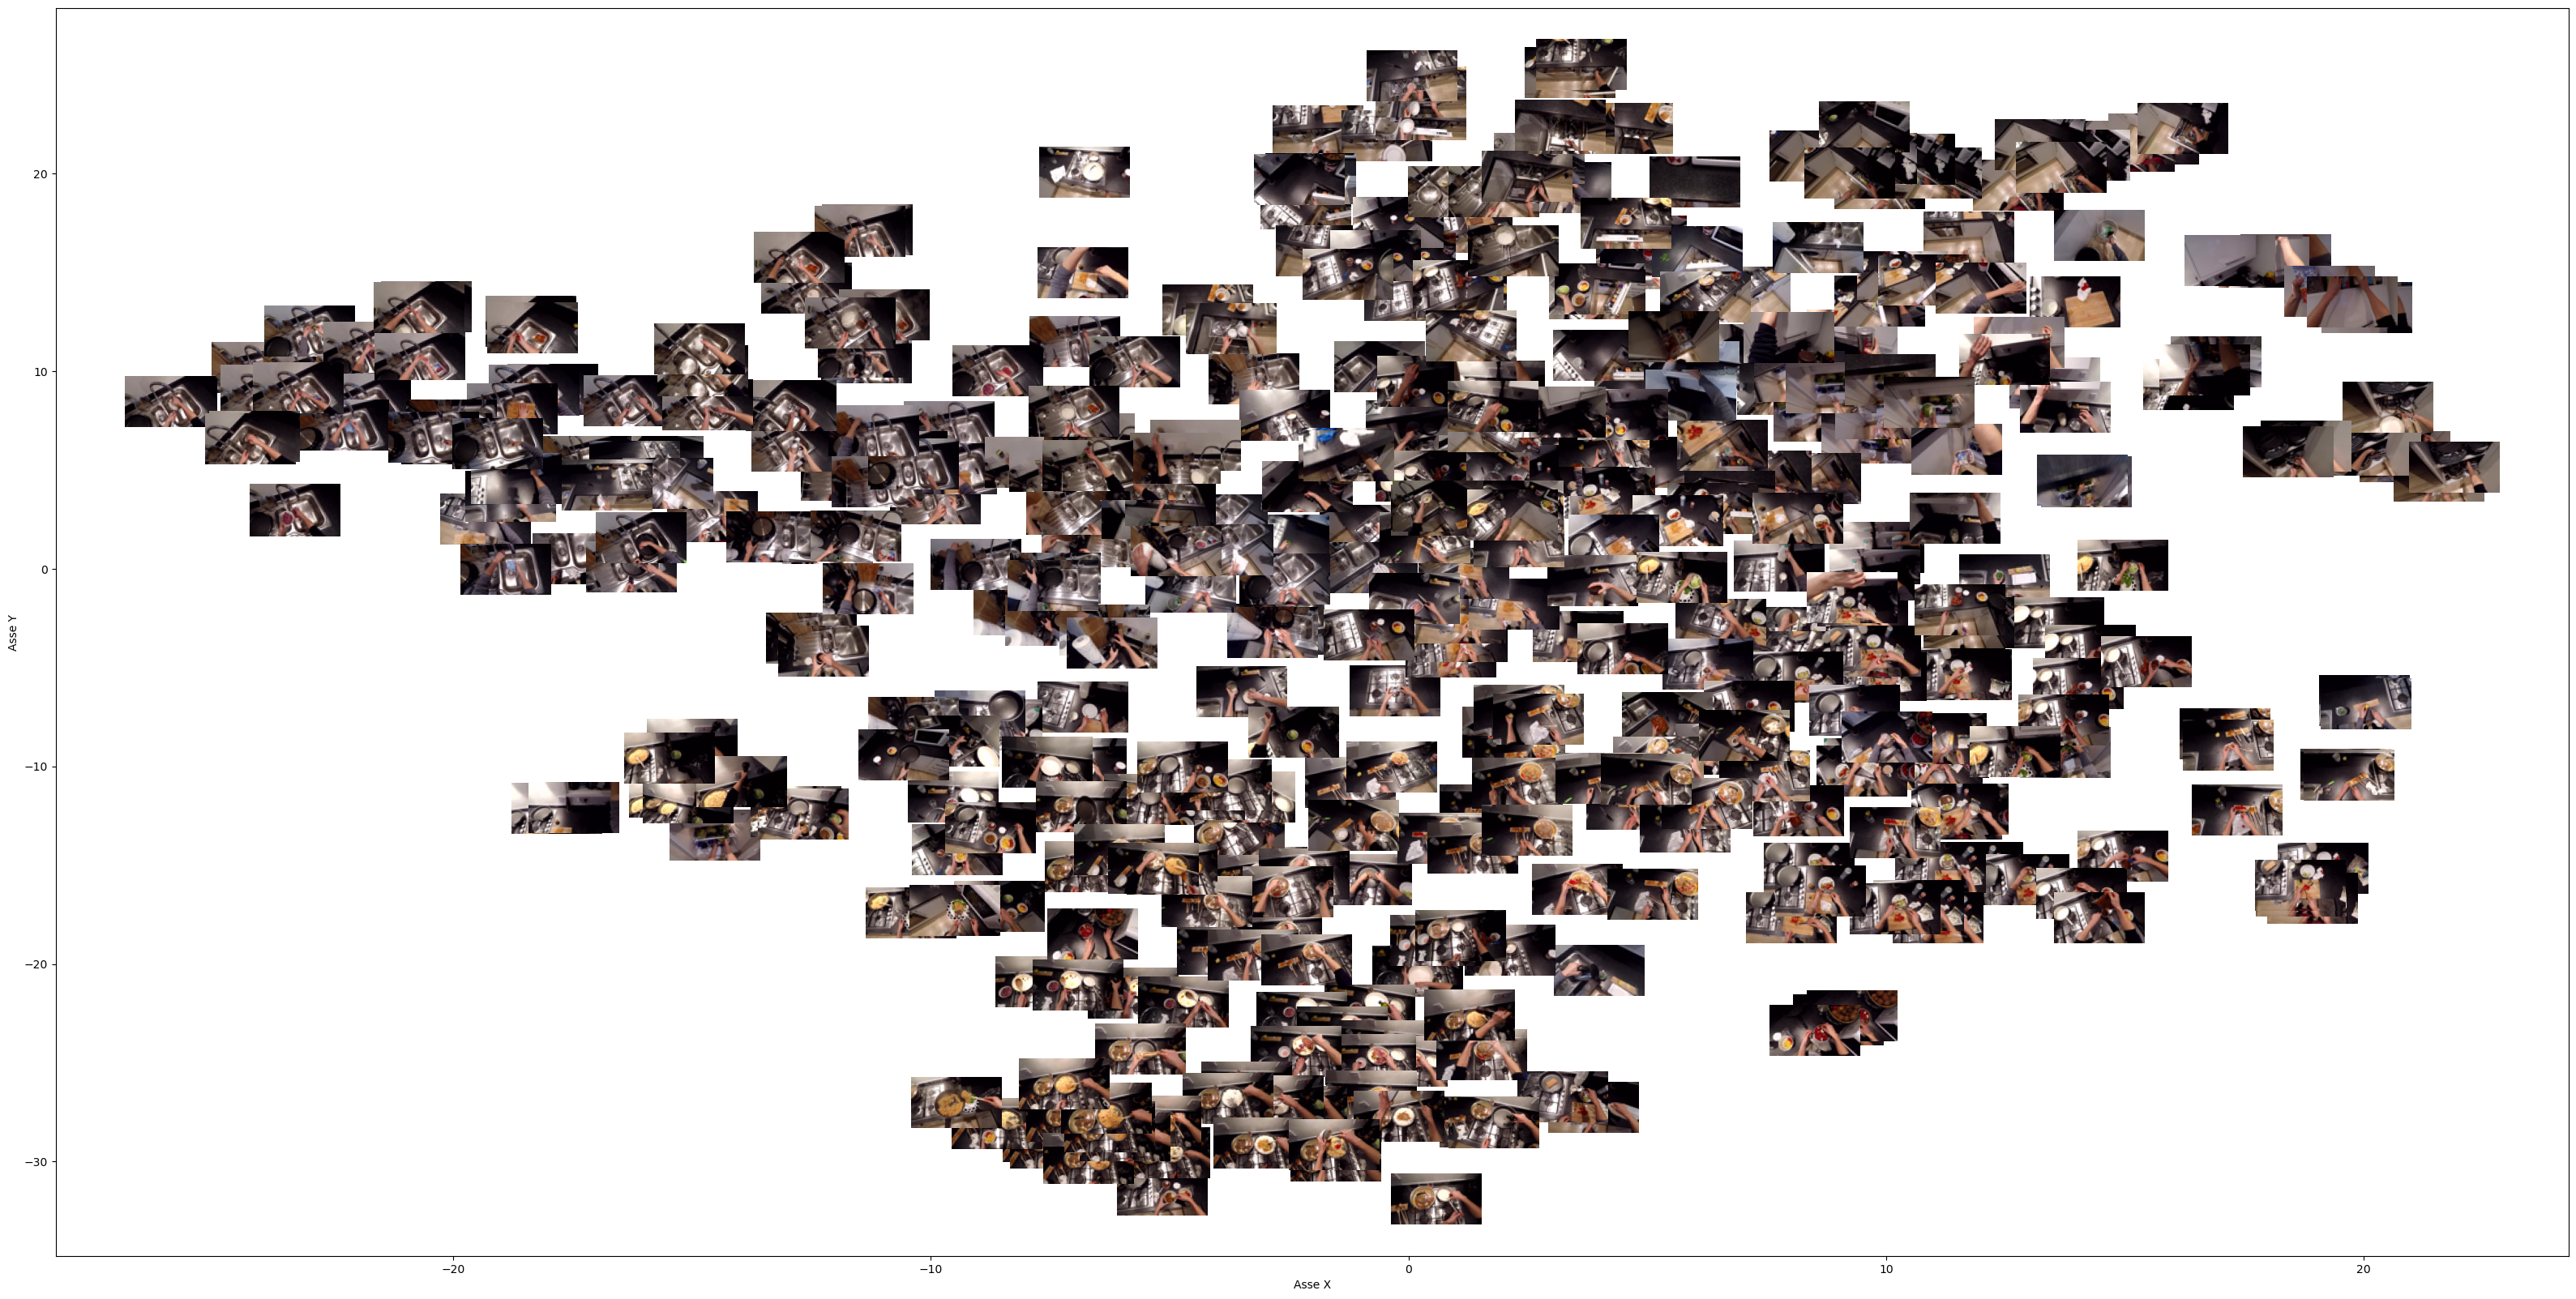

In [27]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image




def get_features(features_dict,df)->list:
    """
    Print features stored in a dictionary.
    """
    my_features=[]
                
    selected_images=[]
    
    
    for _, features in features_dict.items():
    
    
        count=0
 
        for v in features:
            #print(v)
            feat=v.get("features_RGB")
            #print(len(feat[0]))
            my_features.append(feat)


            u_id_to_extract = v.get("uid")

            # Filter DataFrame based on video_id
            filtered_df = df[df['uid'] == u_id_to_extract]
            #print("FILTERED DATASET", filtered_df)

            # Extract unique start_frame and stop_frame values
            start_frames = filtered_df['start_frame'].tolist()
            stop_frames = filtered_df['stop_frame'].tolist()
            central_image=(stop_frames[0]-start_frames[0])//2+ start_frames[0]
            #central_image_indices.append(central_image)

            #print(start_frames," ", stop_frames, " ", central_image)

            # Directory contenente le immagini
            directory = '../ek_data/frames/'+v.get('video_name')

            #print(directory)
            # Filtra i file nell a directory
            selected_images.append(directory + "/"+ [f for f in os.listdir(directory) if str(central_image) in f][0])

            # Visualizza i nomi delle immagini selezionate
            #print(selected_images)


    return my_features,selected_images



def plot_features(path, dataframe):
 
    with open(path, 'rb') as file:
        features_dict = pickle.load(file)

    # Visualize the features
    my_features,selected_images=get_features(features_dict,dataframe)

    #print(len(selected_images))

    aggregated_features=[]
    # Calculate the mean along the first axis (axis=0) to obtain a single vector
    for f in my_features:
        aggregated_features.append(np.mean(f, axis=0))

    # Now 'average_vector' is a 1D array of size 1024 representing the average of the corresponding elements
    print("aggregated_featrues",aggregated_features)
    print("Len aggregated featrues", len(aggregated_features))
    # Converti la lista di vettori in un array 2D
    #my_features = np.vstack(my_features)

    """     # Riduci le dimensioni con PCA
    pca = PCA(n_components=2)
    features_reduced = pca.fit_transform(aggregated_features)
    """
    # Definire il modello t-SNE
    tsne = TSNE(n_components=2, random_state=42)

    # Addestrare il modello e trasformare i dati
    features_reduced = tsne.fit_transform(np.array(aggregated_features))

    # Plot del risultato del clustering
    colors = ['r.', 'g.', 'b.', 'c.', 'm.', 'y.']
    

    """     
    plt.scatter(features_reduced[:, 0],features_reduced[:, 1], marker='o', s=10, linewidths=1, zorder=10, color='red')
        
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


    """
    # Creazione dello scatter plot
    fig, ax = plt.subplots(figsize=(40, 20))

    # Aggiungi gli scatter points
    scatter = ax.scatter(features_reduced[:, 0], features_reduced[:, 1])

    # Aggiungi le immagini come marker
    for x, y, path in zip(features_reduced[:, 0], features_reduced[:, 1], selected_images):
        img = Image.open(path)
        #img = img.resize((40, 40), Image.ANTIALIAS)  # Aumenta la dimensione dell'immagine con anti-aliasing
   
        img.thumbnail((80, 80))  # Imposta le dimensioni dell'immagine del marker
        imagebox = OffsetImage(img, zoom=1)
        ab = AnnotationBbox(imagebox, (x, y), frameon=False, xycoords='data', boxcoords="data", pad=0.3)
        ax.add_artist(ab)
        # Imposta i label degli assi
        ax.set_xlabel('Asse X')
        ax.set_ylabel('Asse Y')

    # Aggiungi una legenda se necessario
    # ax.legend()

    # Mostra il plot
    plt.show()

with open('./train_val/D1_test.pkl', 'rb') as file:
        data = pickle.load(file)
        df = pd.DataFrame(data)

       
plot_features('./saved_features/features_25_D1_test.pkl', df )
